In [1]:
import numpy as np
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

In [2]:
diabetic_data = pd.read_csv('Data/diabetic_data.csv')
diabetic_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
#Remove '?' from data and replace with 'nan'
diabetic_data = diabetic_data.replace("?",np.nan)

In [5]:
diabetic_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
#Checking the number of columns which are objects
len(diabetic_data.select_dtypes('O').columns)

37

In [7]:
#Calculate the proportion of each unique value in the 'readmitted' column
diabetic_data['readmitted'].value_counts()/len(diabetic_data)

readmitted
NO     0.539119
>30    0.349282
<30    0.111599
Name: count, dtype: float64

In [8]:
diabetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [9]:
#Compute percentage of rows with >1 missing value
diabetic_data.isnull().sum()[diabetic_data.isnull().sum()>1]/len(diabetic_data)*100

race                  2.233555
weight               96.858479
payer_code           39.557416
medical_specialty    49.082208
diag_1                0.020636
diag_2                0.351787
diag_3                1.398306
max_glu_serum        94.746772
A1Cresult            83.277322
dtype: float64

In [10]:
#Removing columns with higher missing values
diabetic_data.drop(['weight','payer_code','medical_specialty'],axis=1,inplace=True)

Exploratory Data Analysis

In [11]:
diabetic_data['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)


This column our target feature. 
If the patient was readmitted in less than 30 days "<30"
if the patient was readmitted in more than 30 days ">30"
If there is no record "NO"
We are reducing these values to two and map them according to the following rule;

NO -> 0 <30
30 -> 1

In [12]:
diabetic_data = diabetic_data.replace({"NO":0,
                         "<30":1,
                         ">30":0})

print(diabetic_data.readmitted.value_counts())

C:\Users\ual-laptop\AppData\Local\Temp\ipykernel_16012\4208918711.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diabetic_data = diabetic_data.replace({"NO":0,


readmitted
0    90409
1    11357
Name: count, dtype: int64


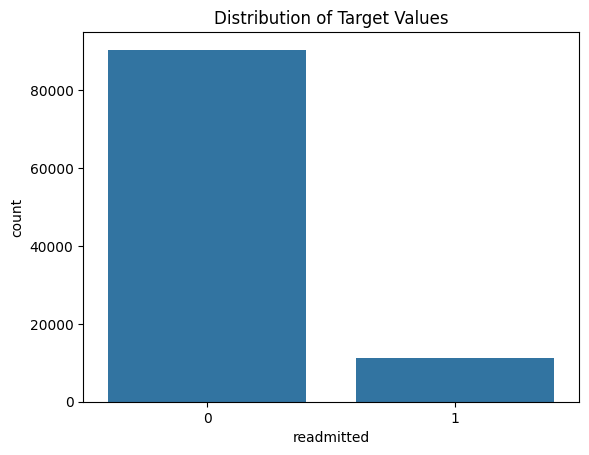

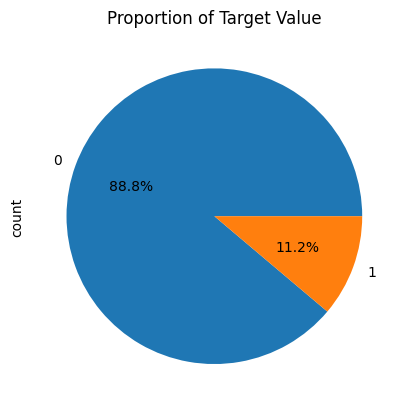

In [13]:
sns.countplot(x = "readmitted", data = diabetic_data)
plt.title("Distribution of Target Values")
plt.show()

# Pie chart
diabetic_data.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

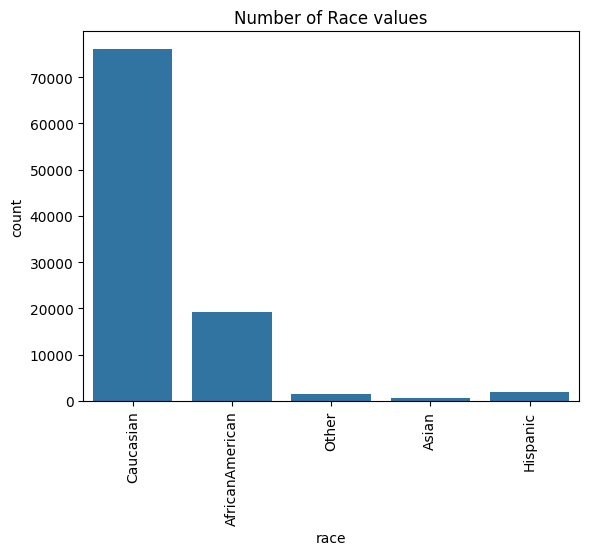

Proportion of Race
race
Caucasian          76.486788
AfricanAmerican    19.307891
Hispanic            2.047380
Other               1.513674
Asian               0.644266
Name: proportion, dtype: float64


In [14]:
sns.countplot(x=diabetic_data.race, data = diabetic_data)
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race")
print(diabetic_data.race.value_counts(normalize = True)*100)

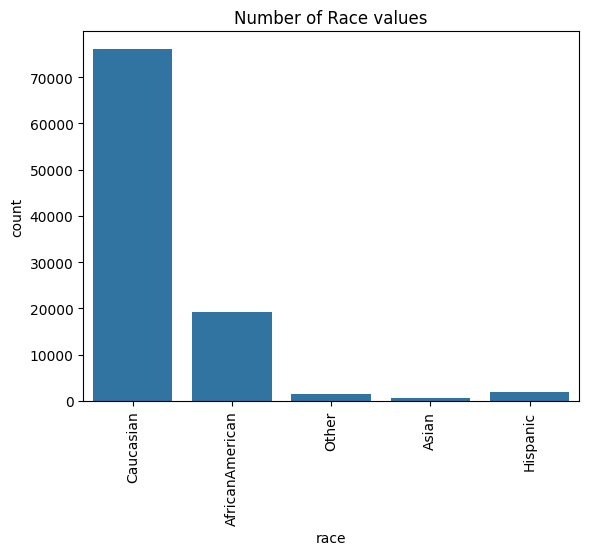

Proportion of Race
race
Caucasian          76.486788
AfricanAmerican    19.307891
Hispanic            2.047380
Other               1.513674
Asian               0.644266
Name: proportion, dtype: float64


In [15]:
sns.countplot(x=diabetic_data.race, data = diabetic_data)
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race")
print(diabetic_data.race.value_counts(normalize = True)*100)

Caucasian and African American is cpmapritively higher than other races in the data. Hence, we can add the other race to 'other'

In [16]:
mapped_race = {"Asian":"Other","Hispanic":"Other"}
diabetic_data.race = diabetic_data.race.replace(mapped_race)

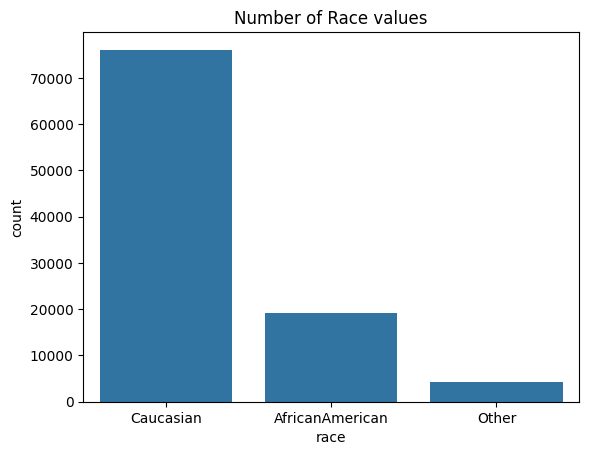

Proportion of Race After the Mapping
race
Caucasian          76.486788
AfricanAmerican    19.307891
Other               4.205321
Name: proportion, dtype: float64


In [17]:
sns.countplot(x="race", data = diabetic_data)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race After the Mapping")
print(diabetic_data.race.value_counts(normalize= True)*100)

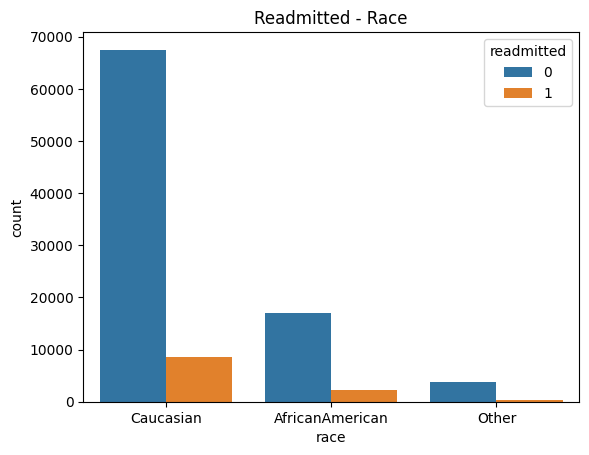

In [18]:
sns.countplot(x="race", hue= "readmitted", data = diabetic_data)
plt.title("Readmitted - Race")
plt.show()

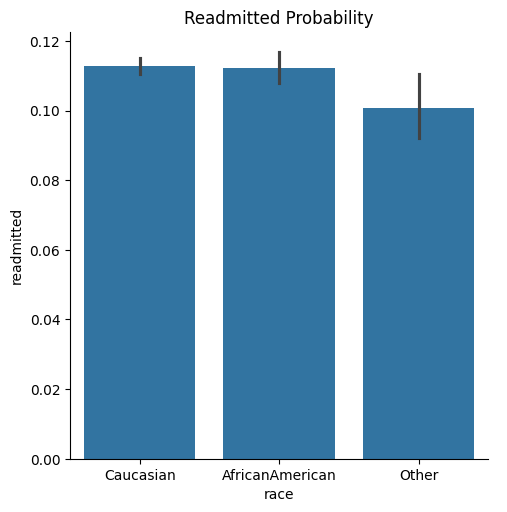

In [19]:

sns.catplot(x = "race", y = "readmitted",
            data = diabetic_data, kind = "bar", height= 5)
plt.title("Readmitted Probability")
plt.show()

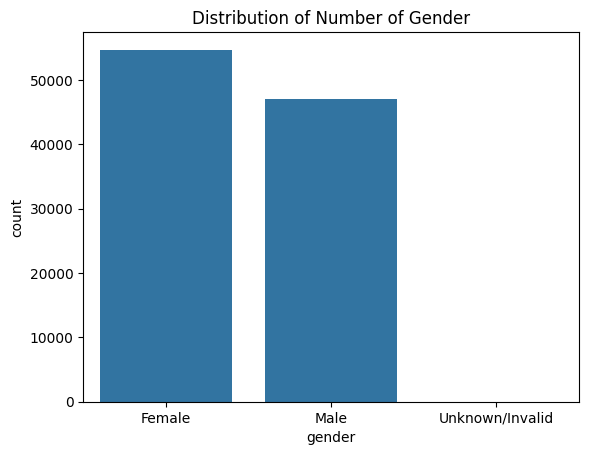

Proportions of Race Value
gender
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: proportion, dtype: float64


In [20]:
sns.countplot(x = "gender", data = diabetic_data)
plt.title("Distribution of Number of Gender")
plt.show()

print("Proportions of Race Value")
print(diabetic_data.gender.value_counts(normalize = True))

In [21]:
diabetic_data = diabetic_data.drop(diabetic_data.loc[diabetic_data["gender"]=="Unknown/Invalid"].index, axis=0)

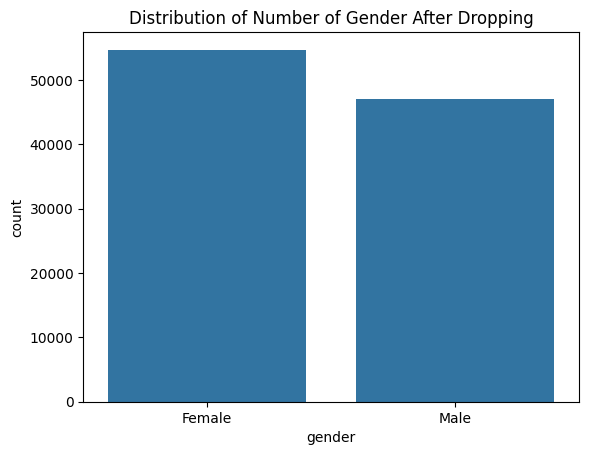

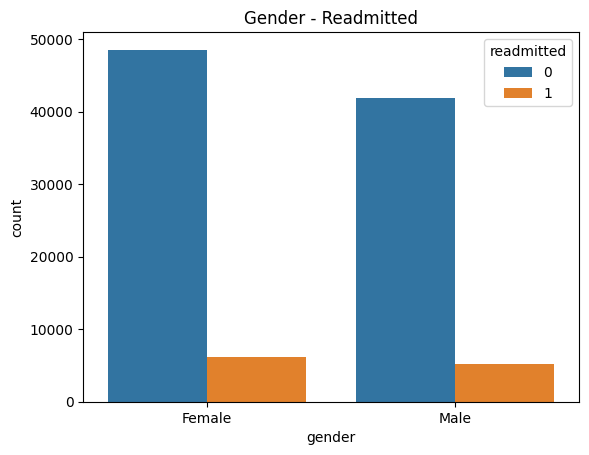

In [22]:
sns.countplot(x = "gender", data = diabetic_data)
plt.title("Distribution of Number of Gender After Dropping")
plt.show()

sns.countplot(x = "gender", hue = "readmitted", data = diabetic_data)
plt.title("Gender - Readmitted")
plt.show()

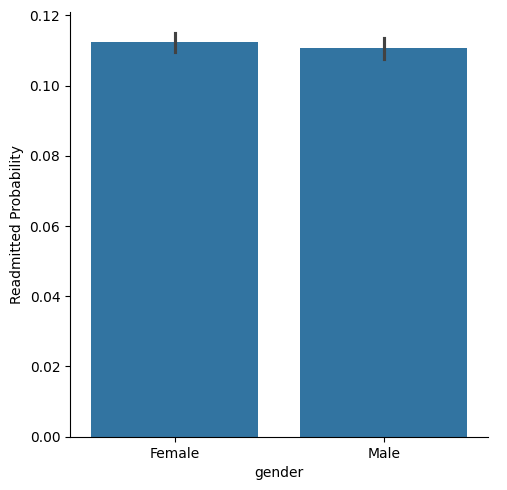

In [23]:
g = sns.catplot(x = "gender",y = "readmitted", 
                data = diabetic_data, kind = "bar", height= 5)
g.set_ylabels("Readmitted Probability")
plt.show()

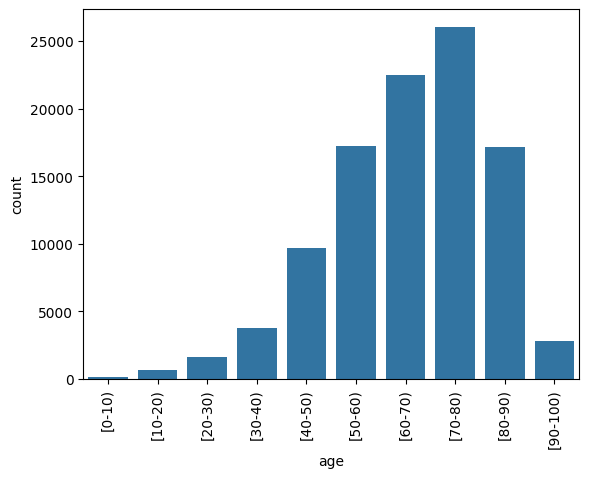

In [24]:
sns.countplot(x="age", data = diabetic_data)
plt.xticks(rotation = 90)
plt.show()

C:\Users\ual-laptop\AppData\Local\Temp\ipykernel_16012\517417871.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diabetic_data.age = diabetic_data.age.replace({"[70-80)":75,


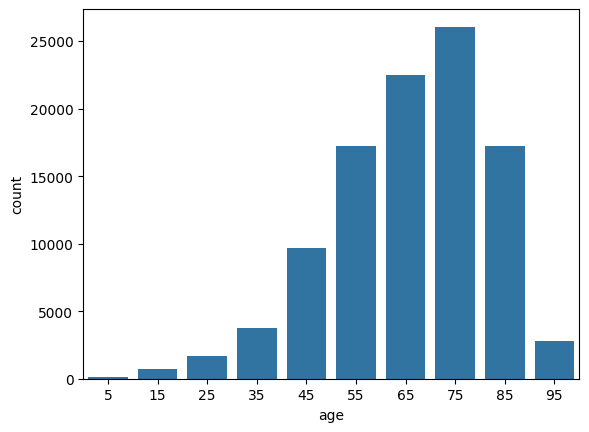

In [25]:
diabetic_data.age = diabetic_data.age.replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

sns.countplot(x="age", data = diabetic_data)
#plt.xticks(rotation = 90)
plt.show()

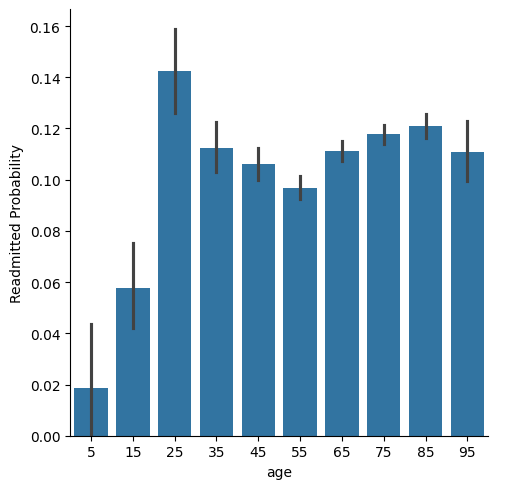

In [26]:
g = sns.catplot(x = "age", y = "readmitted", data = diabetic_data, 
                   kind = "bar", height = 5)
g.set_ylabels("Readmitted Probability")
plt.show()


Admission Type ID¶
Integer identifier corresponding to 9 distinct values;

Emergency : 1
Urgent : 2
Elective : 3
Newborn : 4
Not Available : 5
NULL : 6
Trauma Center : 7
Not Mapped : 8

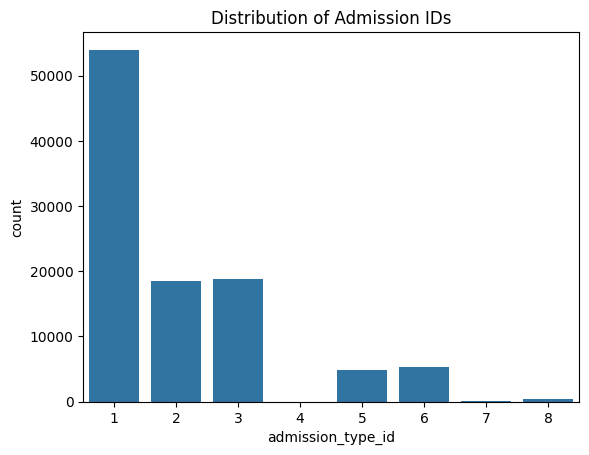

Distribution of ID's
admission_type_id
1    53988
3    18868
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64


In [27]:
sns.countplot(x = "admission_type_id", data = diabetic_data)
plt.title("Distribution of Admission IDs")
plt.show()

print("Distribution of ID's")
print(diabetic_data.admission_type_id.value_counts())

Distribution of ID's
1    53988
3    18868
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64
In here we need to do mapping for :

NULL, Not Available and Not Mapped values.
In addition, we will map Urgent value as Emergency because they have same meaning

In [28]:
mapped = {1.0:"Emergency",
          2.0:"Emergency",
          3.0:"Elective",
          4.0:"New Born",
          5.0:np.nan,
          6.0:np.nan,
          7.0:"Trauma Center",
          8.0:np.nan}

diabetic_data.admission_type_id = diabetic_data.admission_type_id.replace(mapped)

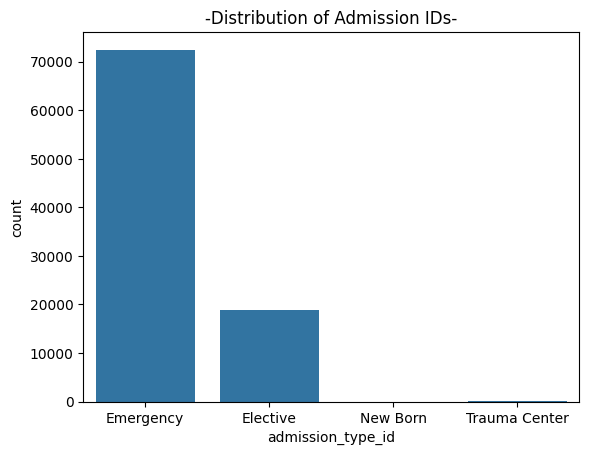

-Distribution of ID's-
admission_type_id
Emergency        72468
Elective         18868
Trauma Center       21
New Born            10
Name: count, dtype: int64


In [29]:
sns.countplot(x = "admission_type_id", data = diabetic_data)
plt.title("-Distribution of Admission IDs-")
plt.show()

print("-Distribution of ID's-")
print(diabetic_data.admission_type_id.value_counts())


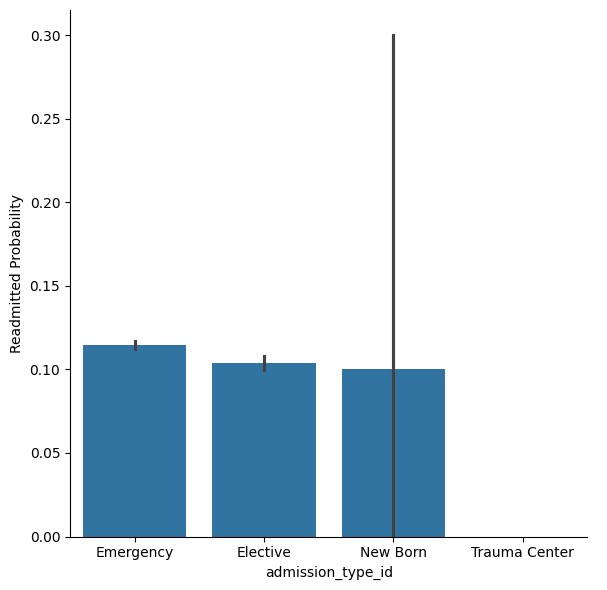

In [30]:
g = sns.catplot(x = "admission_type_id", y ="readmitted", 
                    data = diabetic_data, height = 6, kind = "bar")
g.set_ylabels("Readmitted Probability")
plt.show()

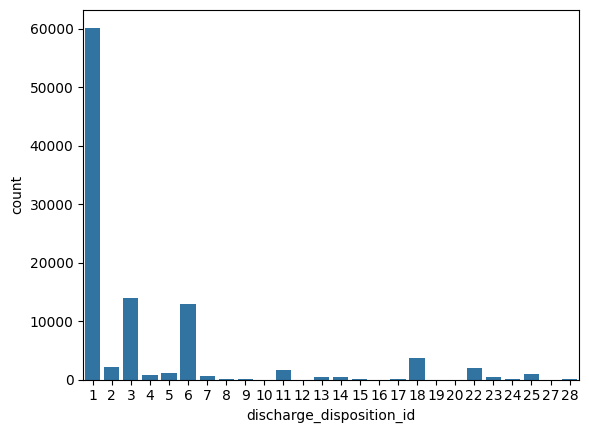

In [31]:
sns.countplot(x ="discharge_disposition_id", data = diabetic_data)
plt.show()

In [32]:
diabetic_data['discharge_disposition_id'].unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27], dtype=int64)

In [33]:
mapped_discharge = {1:"Discharged to Home",
                    6:"Discharged to Home",
                    8:"Discharged to Home",
                    13:"Discharged to Home",
                    19:"Discharged to Home",
                    18:np.nan,25:np.nan,26:np.nan,
                    2:"Other",3:"Other",4:"Other",
                    5:"Other",7:"Other",9:"Other",
                    10:"Other",11:"Other",12:"Other",
                    14:"Other",15:"Other",16:"Other",
                    17:"Other",20:"Other",21:"Other",
                    22:"Other",23:"Other",24:"Other",
                    27:"Other",28:"Other",29:"Other",30:"Other"}

diabetic_data["discharge_disposition_id"] = diabetic_data["discharge_disposition_id"].replace(mapped_discharge)

In [34]:
diabetic_data['discharge_disposition_id'].unique()


array([nan, 'Discharged to Home', 'Other'], dtype=object)

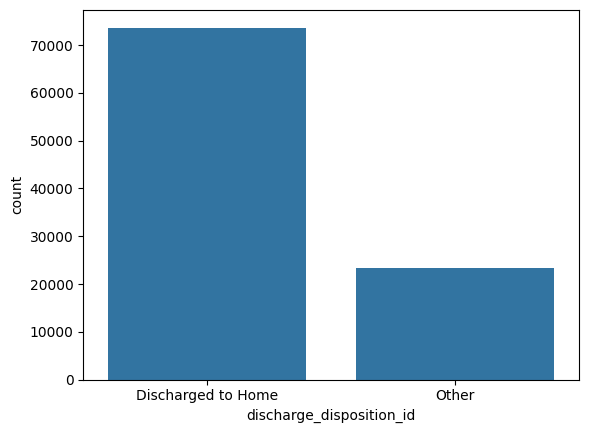

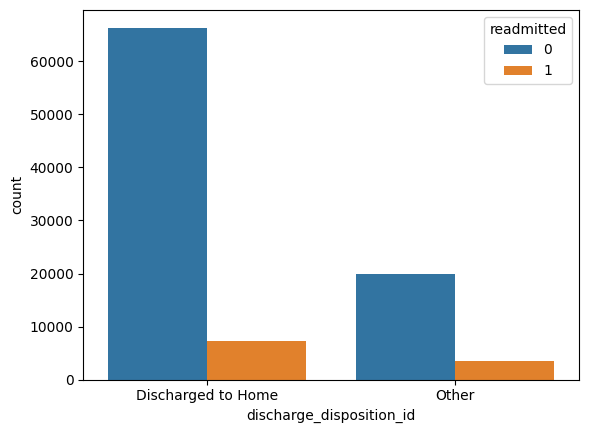

Proportions of ID's
discharge_disposition_id
Discharged to Home    73649
Other                 23434
Name: count, dtype: int64


In [35]:
sns.countplot(x ="discharge_disposition_id", data = diabetic_data)
plt.show()

sns.countplot(x ="discharge_disposition_id", hue = "readmitted", data = diabetic_data)
plt.show()

print("Proportions of ID's")
print(diabetic_data.discharge_disposition_id.value_counts())

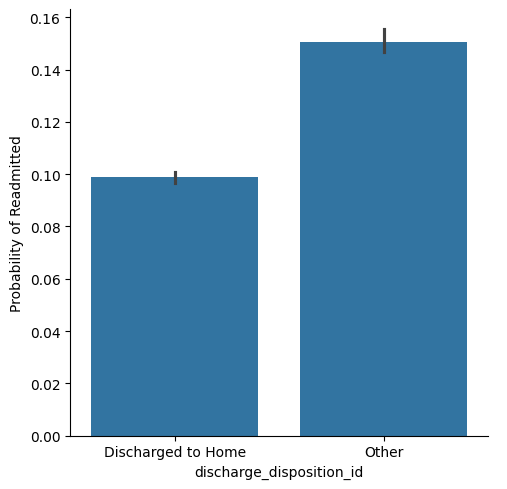

In [36]:
g = sns.catplot(x = "discharge_disposition_id", y="readmitted", 
                data = diabetic_data, height = 5, kind ="bar")
g.set_ylabels("Probability of Readmitted")
plt.show()

Admission Source ID

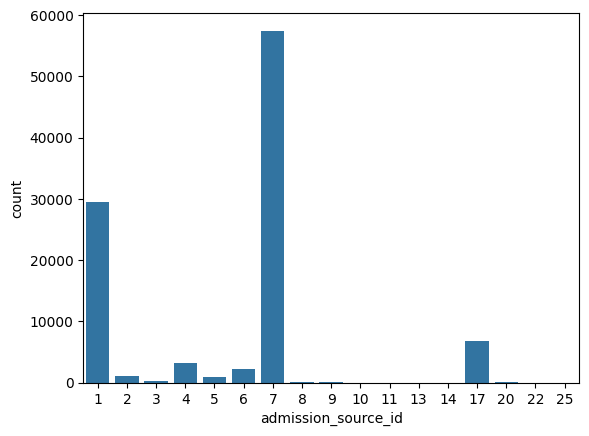

In [37]:
sns.countplot(x ="admission_source_id", data = diabetic_data)
plt.show()

#### Applying mapping

##### Putting similar ones together like Referral or Transfer
##### Replace Null, Not Mapped, Unknown values as NAN

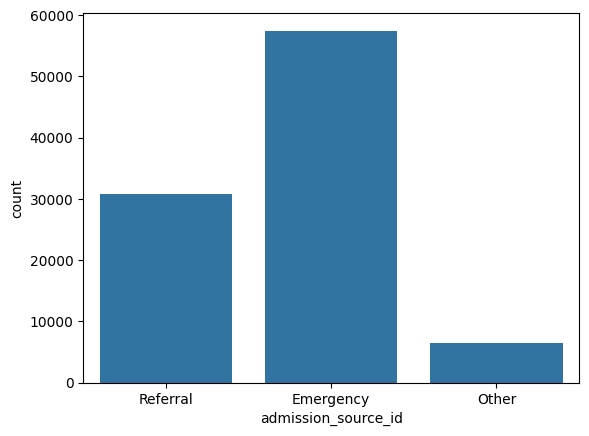

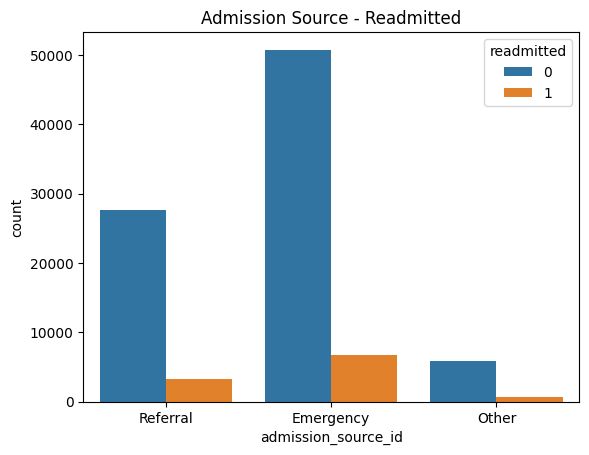

admission_source_id
Emergency    57492
Referral     30855
Other         6474
Name: count, dtype: int64


In [38]:
mapped_adm = {1:"Referral",2:"Referral",3:"Referral",
              4:"Other",5:"Other",6:"Other",10:"Other",22:"Other",25:"Other",
              9:"Other",8:"Other",14:"Other",13:"Other",11:"Other",
              15:np.nan,17:np.nan,20:np.nan,21:np.nan,
              7:"Emergency"}
diabetic_data.admission_source_id = diabetic_data.admission_source_id.replace(mapped_adm)

sns.countplot(x = "admission_source_id", data = diabetic_data)
plt.show()

sns.countplot(x = "admission_source_id", hue = "readmitted", data = diabetic_data)
plt.title("Admission Source - Readmitted")

plt.show()


print(diabetic_data.admission_source_id.value_counts())

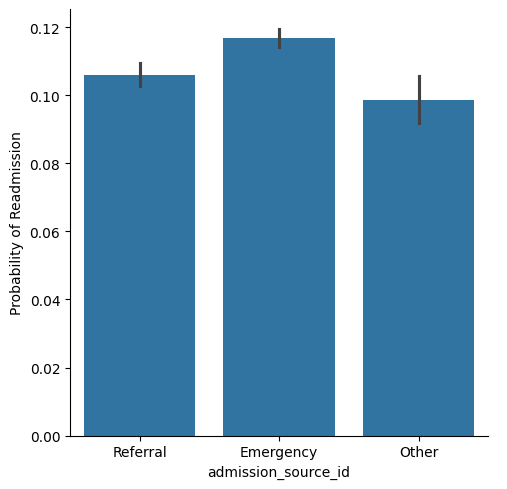

In [39]:
g = sns.catplot(x = "admission_source_id", y ="readmitted", 
                    data = diabetic_data, kind = "bar", height= 5)
g.set_ylabels("Probability of Readmission")
plt.show()

### Time in Hospital

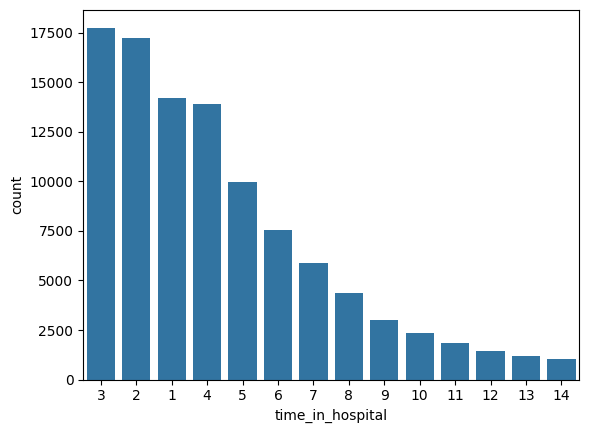

time_in_hospital
3     17756
2     17224
1     14206
4     13924
5      9966
6      7539
7      5859
8      4390
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: count, dtype: int64


In [41]:
sns.countplot(x="time_in_hospital", data = diabetic_data,
              order = diabetic_data.time_in_hospital.value_counts().index)
plt.show()

print(diabetic_data.time_in_hospital.value_counts())

C:\Users\ual-laptop\AppData\Local\Temp\ipykernel_16012\4108466814.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(diabetic_data.loc[(diabetic_data.readmitted == 0), "time_in_hospital"],
C:\Users\ual-laptop\AppData\Local\Temp\ipykernel_16012\4108466814.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(diabetic_data.loc[(diabetic_data.readmitted == 1), "time_in_hospital"],


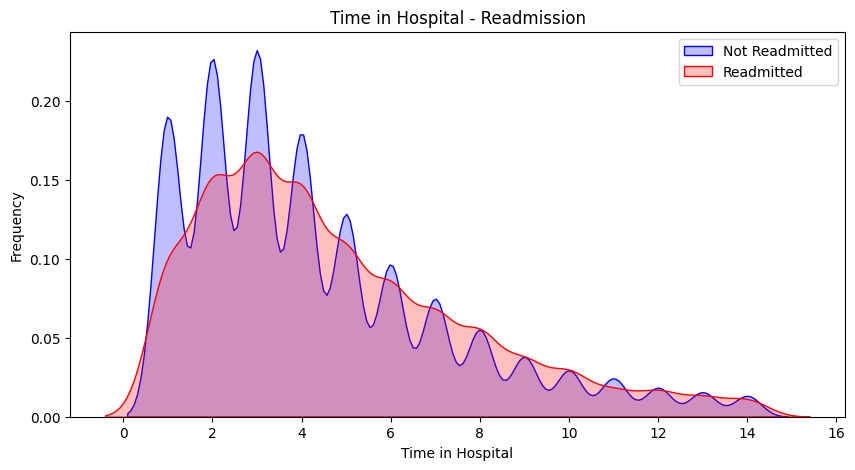

In [42]:
fig = plt.figure(figsize=(10,5))

#readmitted = 0
ax = sns.kdeplot(diabetic_data.loc[(diabetic_data.readmitted == 0), "time_in_hospital"],
                 color = "b", shade = True, label = "Not Readmitted")

ax = sns.kdeplot(diabetic_data.loc[(diabetic_data.readmitted == 1), "time_in_hospital"],
                 color = "r", shade = True, label = "Readmitted")
ax.legend(loc="upper right")

ax.set_xlabel("Time in Hospital")
ax.set_ylabel("Frequency")
ax.set_title("Time in Hospital - Readmission")
plt.show()

Most of the people stayed 2-3 days in the hospital

### Number of Lab Procedures

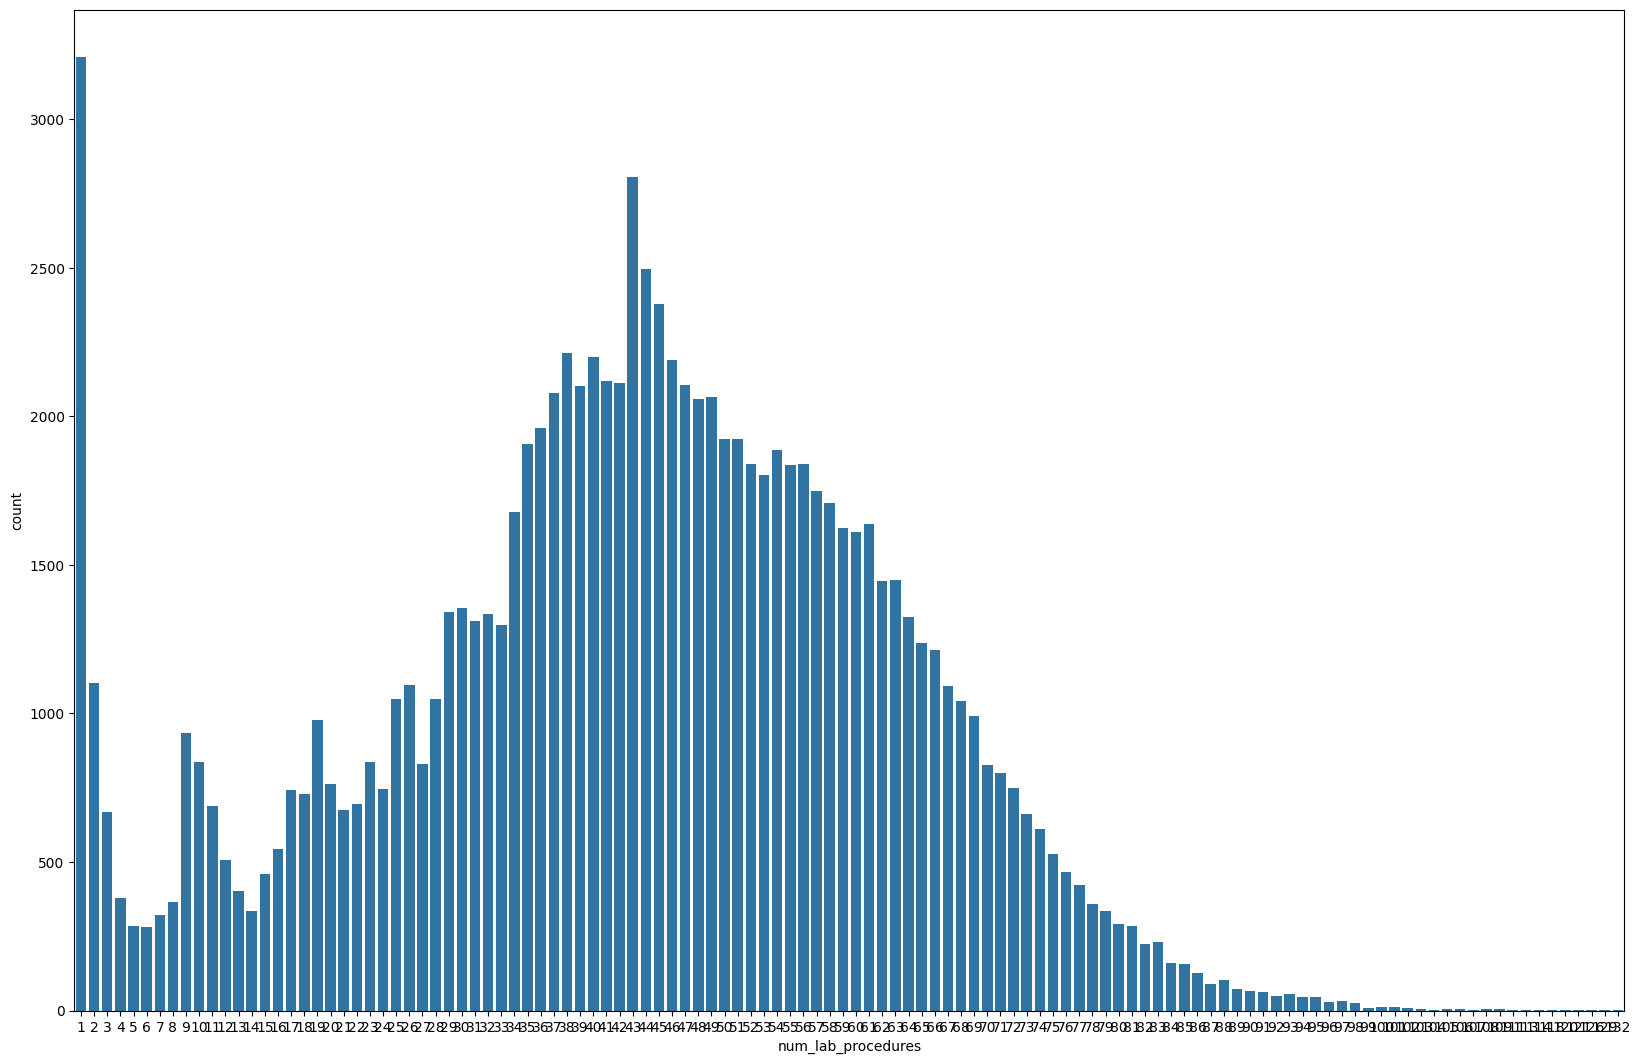

Proportions of Column
num_lab_procedures
1     3208
43    2804
44    2496
45    2376
38    2212
40    2201
46    2189
41    2117
42    2113
47    2106
Name: count, dtype: int64


In [43]:
plt.figure(figsize=(20,13))
sns.countplot(x = "num_lab_procedures", data = diabetic_data)
plt.show()

print("Proportions of Column")
print(diabetic_data.num_lab_procedures.value_counts().head(10))

C:\Users\ual-laptop\AppData\Local\Temp\ipykernel_16012\2005448852.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(diabetic_data.loc[(diabetic_data.readmitted == 0), "num_lab_procedures"],
C:\Users\ual-laptop\AppData\Local\Temp\ipykernel_16012\2005448852.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(diabetic_data.loc[(diabetic_data.readmitted == 1), "num_lab_procedures"],


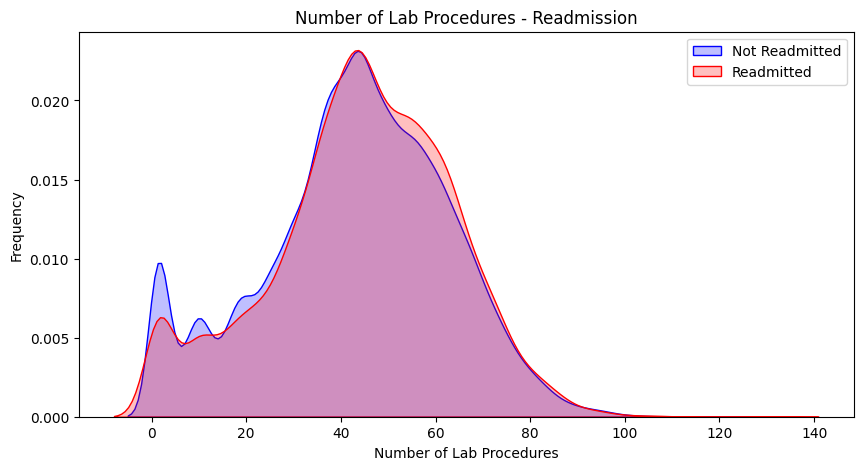

In [44]:
fig = plt.figure(figsize=(10,5))

#readmitted = 0
ax = sns.kdeplot(diabetic_data.loc[(diabetic_data.readmitted == 0), "num_lab_procedures"],
                 color = "b", shade = True,label = "Not Readmitted")

#readmitted = 1
ax = sns.kdeplot(diabetic_data.loc[(diabetic_data.readmitted == 1), "num_lab_procedures"],
                 color = "r", shade = True, label = "Readmitted")

ax.legend(loc="upper right")
ax.set_xlabel("Number of Lab Procedures")
ax.set_ylabel("Frequency")
ax.set_title("Number of Lab Procedures - Readmission")

plt.show()


Number of Procedures

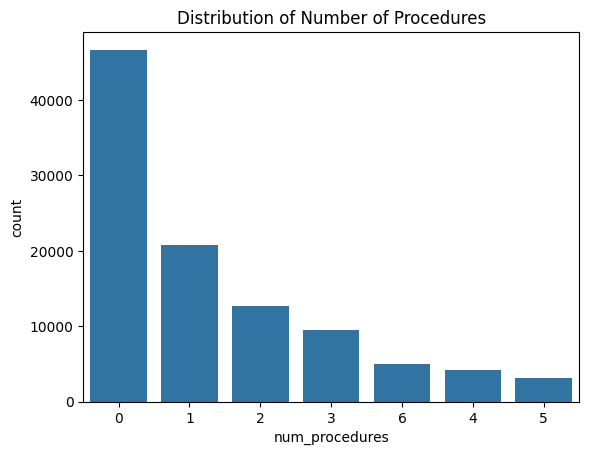

Proportions of Values
num_procedures
0    45.843774
1    20.381671
2    12.495701
3     9.279404
6     4.868174
4     4.107583
5     3.023692
Name: proportion, dtype: float64


In [45]:
sns.countplot(x = diabetic_data.num_procedures, order = diabetic_data.num_procedures.value_counts().index)
plt.title("Distribution of Number of Procedures")
plt.show()

print("Proportions of Values")
print(diabetic_data.num_procedures.value_counts(normalize=True)*100)

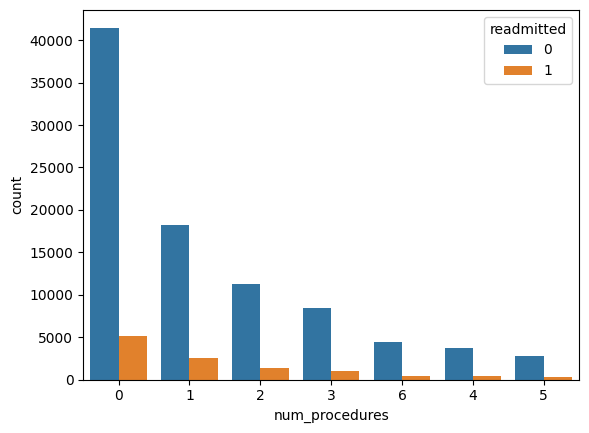

In [46]:
sns.countplot(x = "num_procedures", hue = "readmitted", 
              data = diabetic_data, order = diabetic_data.num_procedures.value_counts().index)
plt.show()

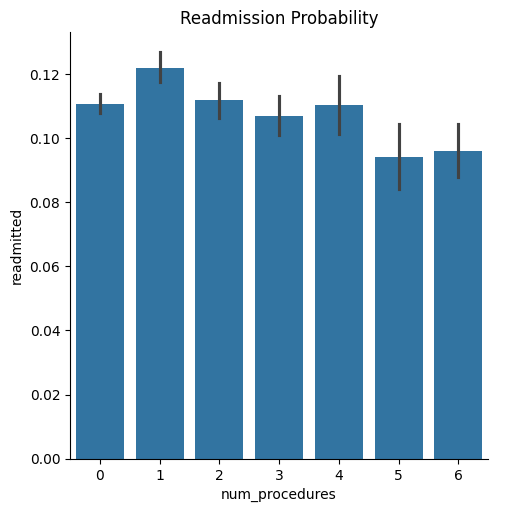

In [47]:
sns.catplot(x = "num_procedures", y = "readmitted",
               data = diabetic_data, kind = "bar", height = 5)
plt.title("Readmission Probability")
plt.show()

Number of Medications

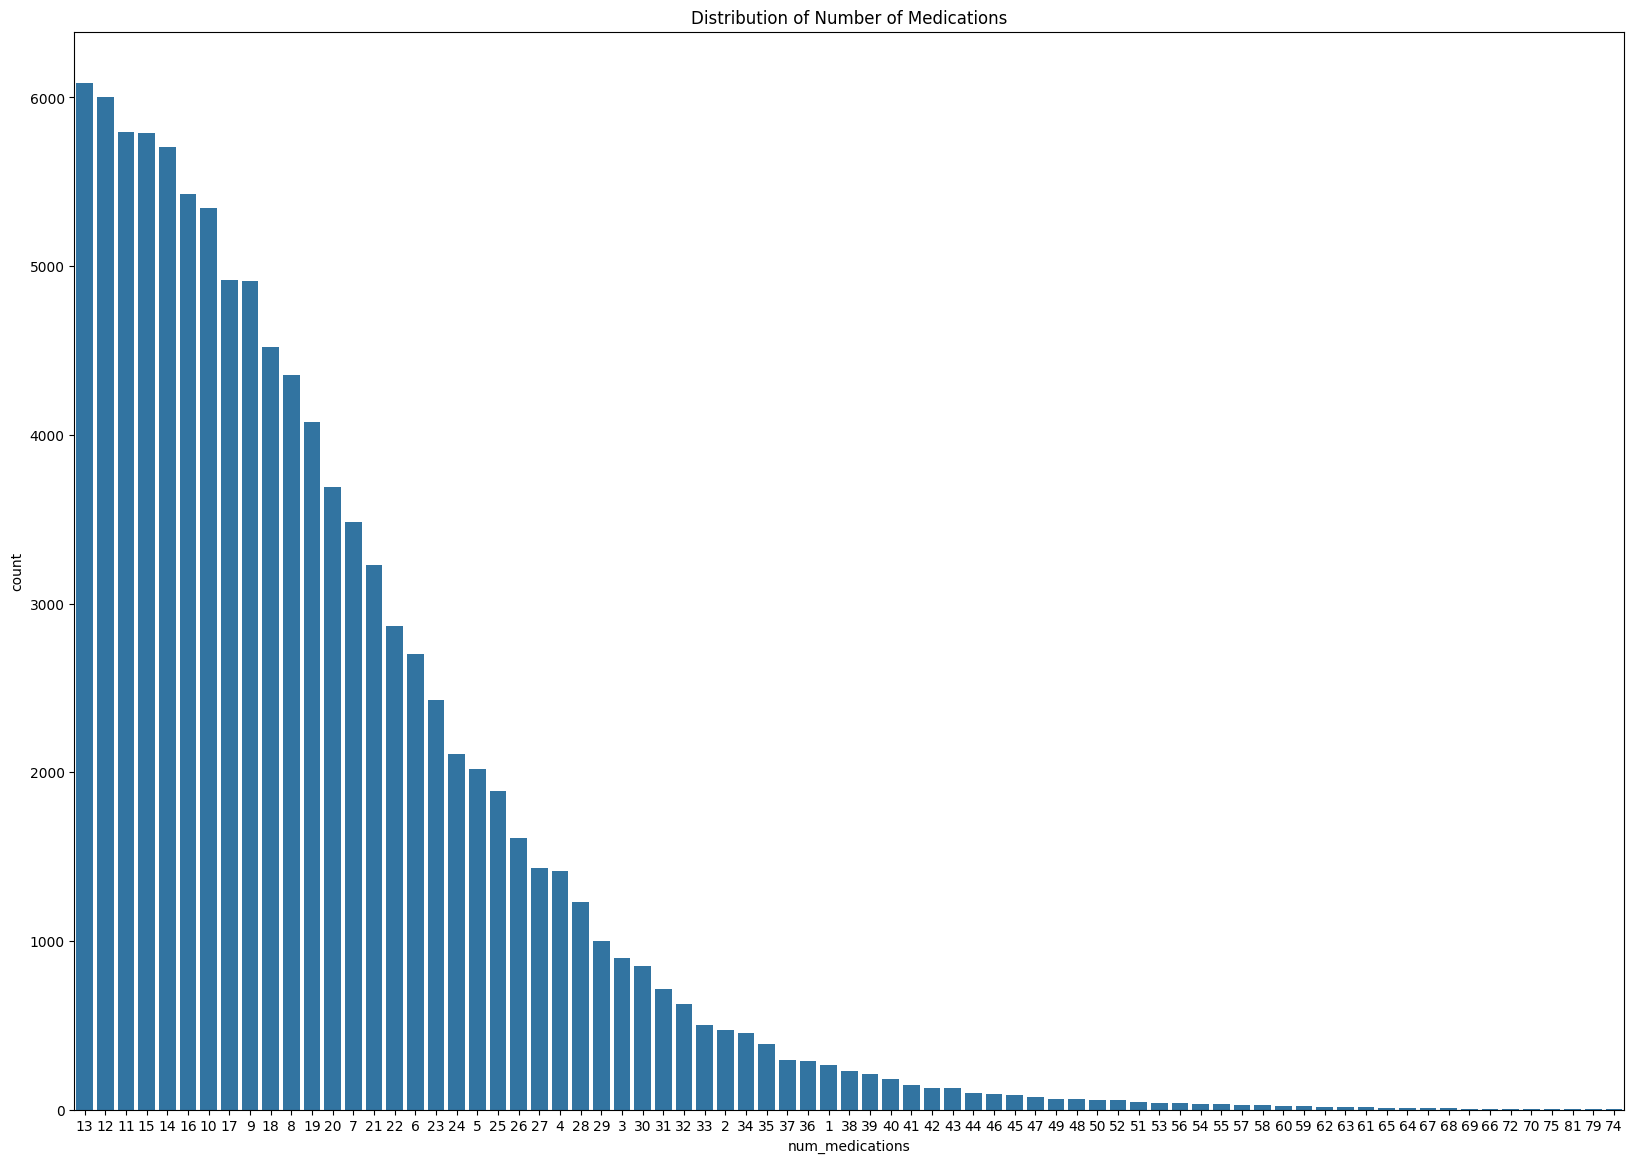

num_medications
13    6086
12    6004
11    5795
15    5792
14    5707
      ... 
70       2
75       2
81       1
79       1
74       1
Name: count, Length: 75, dtype: int64


In [49]:
plt.figure(figsize=(20,14))
sns.countplot(x="num_medications", data = diabetic_data, 
        order = diabetic_data.num_medications.value_counts().index)
plt.title("Distribution of Number of Medications")
plt.show()

print(diabetic_data.num_medications.value_counts())

Mapping Diagnosis

In [50]:
def map_diagnosis(data, cols):
    for col in cols:
        data.loc[(data[col].str.contains("V")) | (data[col].str.contains("E")), col] = -1
        data[col] = data[col].astype(np.float16)

    for col in cols:
        data["temp_diag"] = np.nan
        data.loc[(data[col]>=390) & (data[col]<=459) | (data[col]==785), "temp_diag"] = "Circulatory"
        data.loc[(data[col]>=460) & (data[col]<=519) | (data[col]==786), "temp_diag"] = "Respiratory"
        data.loc[(data[col]>=520) & (data[col]<=579) | (data[col]==787), "temp_diag"] = "Digestive"
        data.loc[(data[col]>=250) & (data[col]<251), "temp_diag"] = "Diabetes"
        data.loc[(data[col]>=800) & (data[col]<=999), "temp_diag"] = "Injury"
        data.loc[(data[col]>=710) & (data[col]<=739), "temp_diag"] = "Muscoloskeletal"
        data.loc[(data[col]>=580) & (data[col]<=629) | (data[col] == 788), "temp_diag"] = "Genitourinary"
        data.loc[(data[col]>=140) & (data[col]<=239), "temp_diag"] = "Neoplasms"
        data["temp_diag"] = data["temp_diag"].fillna("Other")
        data[col] = data["temp_diag"]
        data = data.drop("temp_diag", axis=1)

    return data


In [51]:
diabetic_data = map_diagnosis(diabetic_data,["diag_1","diag_2","diag_3"])


C:\Users\ual-laptop\AppData\Local\Temp\ipykernel_16012\2461742777.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Circulatory' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[(data[col]>=390) & (data[col]<=459) | (data[col]==785), "temp_diag"] = "Circulatory"
C:\Users\ual-laptop\AppData\Local\Temp\ipykernel_16012\2461742777.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Circulatory' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[(data[col]>=390) & (data[col]<=459) | (data[col]==785), "temp_diag"] = "Circulatory"
C:\Users\ual-laptop\AppData\Local\Temp\ipykernel_16012\2461742777.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'C

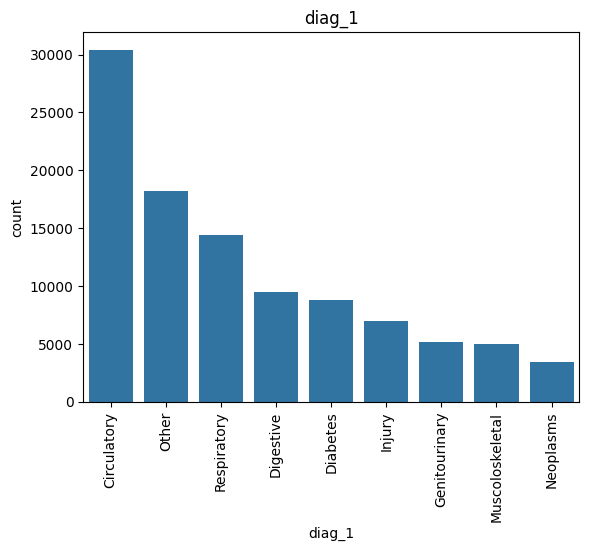

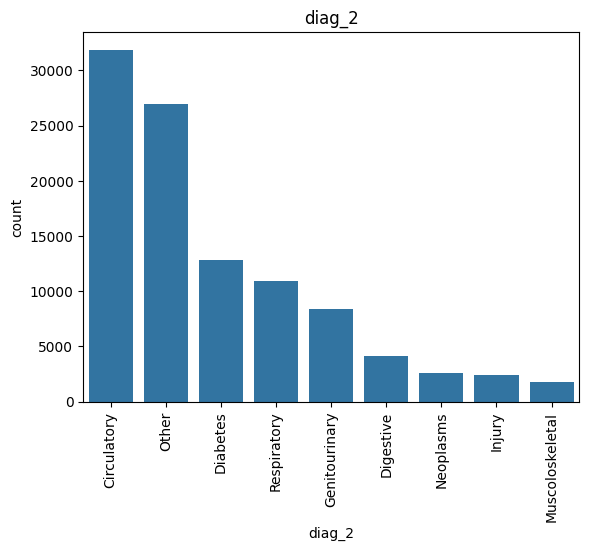

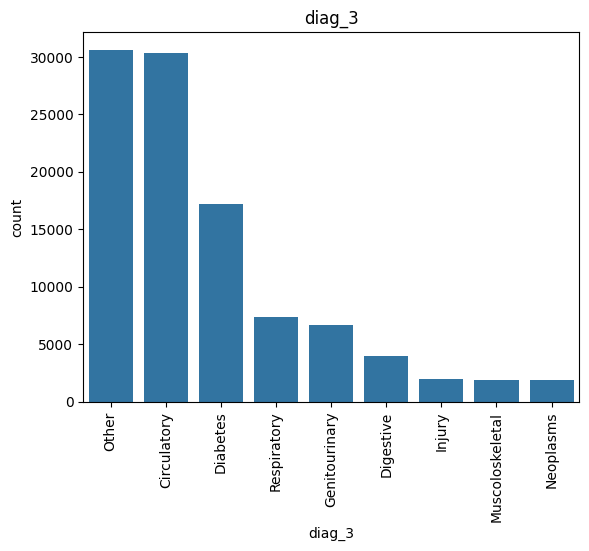

In [52]:
def plot_diags(col,data):
    sns.countplot(x = col, data = data,
            order = data[f"{col}"].value_counts().index)
    plt.xticks(rotation = 90)
    plt.title(col)
    plt.show()

diag_cols = ["diag_1","diag_2","diag_3"]

for diag in diag_cols:
    plot_diags(diag,diabetic_data)


Medication

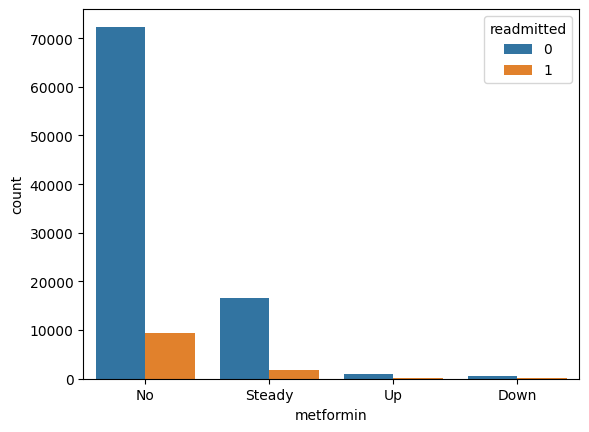

METFORMIN
metformin
No        81776
Steady    18345
Up         1067
Down        575
Name: count, dtype: int64


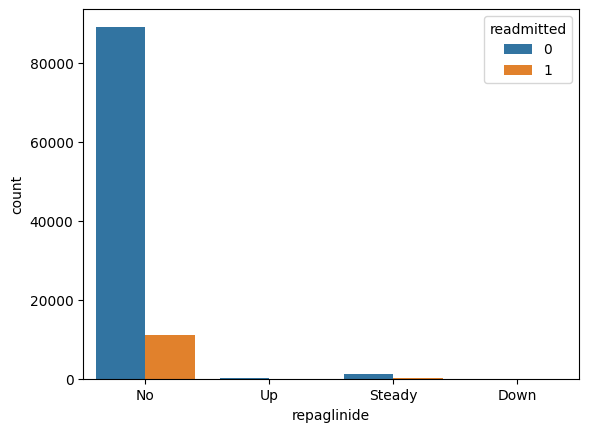

REPAGLINIDE
repaglinide
No        100224
Steady      1384
Up           110
Down          45
Name: count, dtype: int64


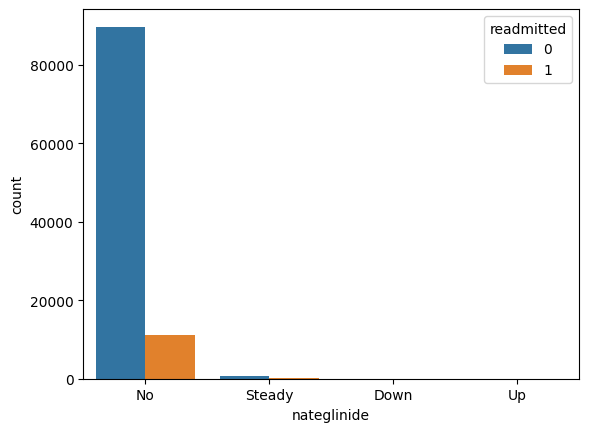

NATEGLINIDE
nateglinide
No        101060
Steady       668
Up            24
Down          11
Name: count, dtype: int64


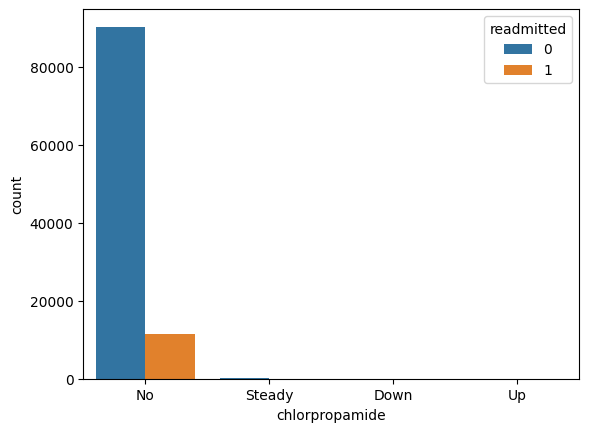

CHLORPROPAMIDE
chlorpropamide
No        101677
Steady        79
Up             6
Down           1
Name: count, dtype: int64


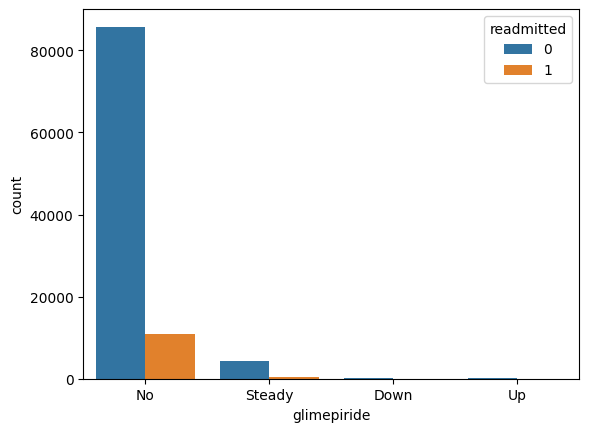

GLIMEPIRIDE
glimepiride
No        96572
Steady     4670
Up          327
Down        194
Name: count, dtype: int64


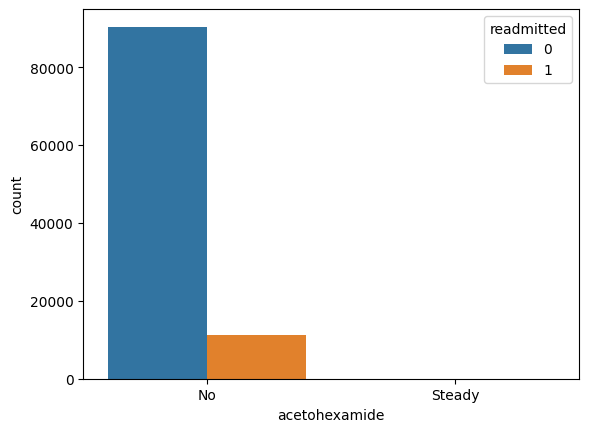

ACETOHEXAMIDE
acetohexamide
No        101762
Steady         1
Name: count, dtype: int64


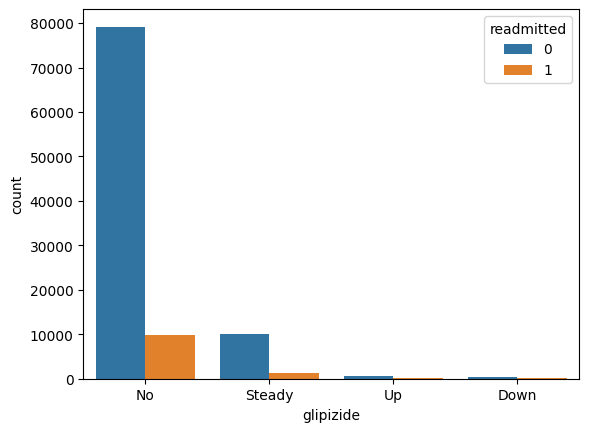

GLIPIZIDE
glipizide
No        89078
Steady    11355
Up          770
Down        560
Name: count, dtype: int64


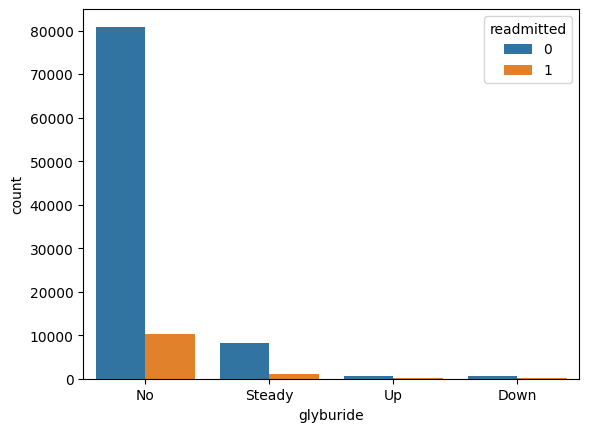

GLYBURIDE
glyburide
No        91113
Steady     9274
Up          812
Down        564
Name: count, dtype: int64


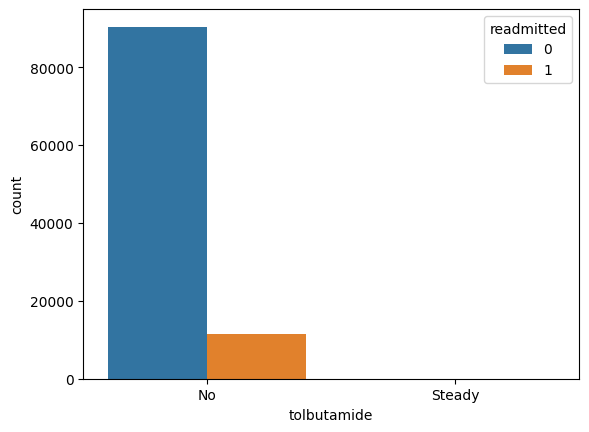

TOLBUTAMIDE
tolbutamide
No        101740
Steady        23
Name: count, dtype: int64


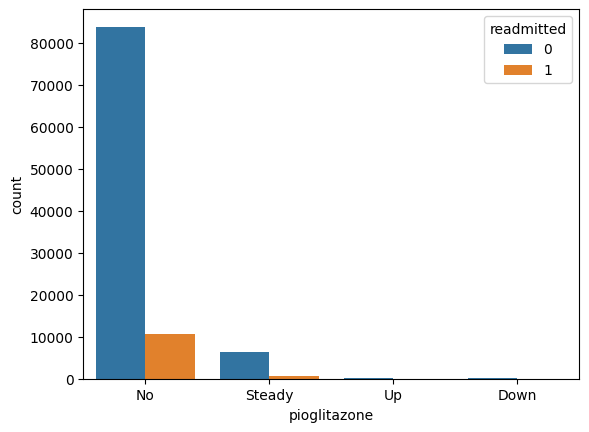

PIOGLITAZONE
pioglitazone
No        94436
Steady     6975
Up          234
Down        118
Name: count, dtype: int64


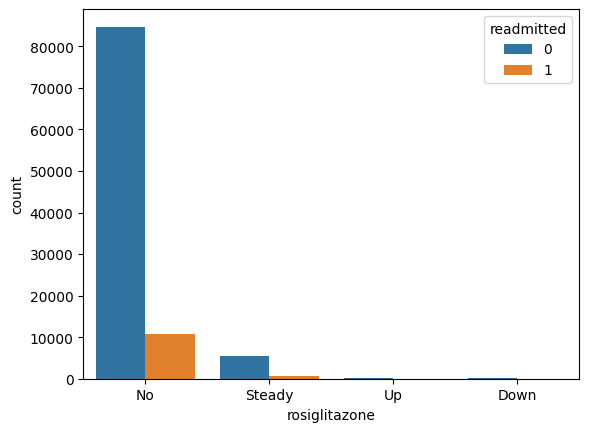

ROSIGLITAZONE
rosiglitazone
No        95399
Steady     6099
Up          178
Down         87
Name: count, dtype: int64


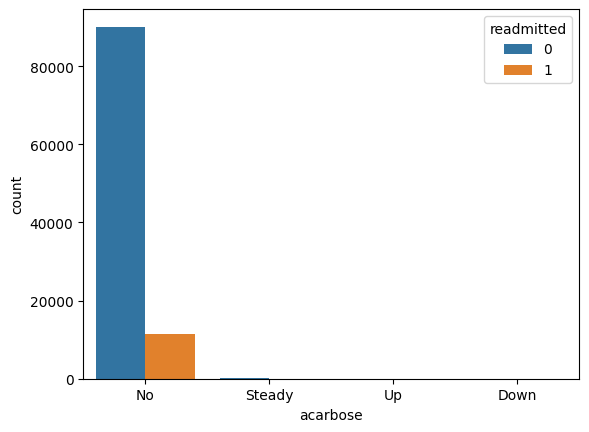

ACARBOSE
acarbose
No        101455
Steady       295
Up            10
Down           3
Name: count, dtype: int64


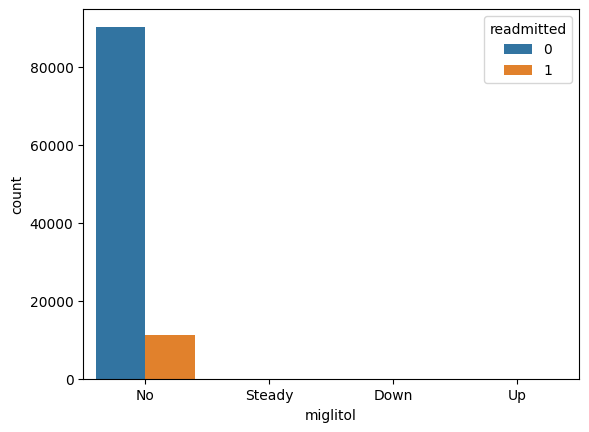

MIGLITOL
miglitol
No        101725
Steady        31
Down           5
Up             2
Name: count, dtype: int64


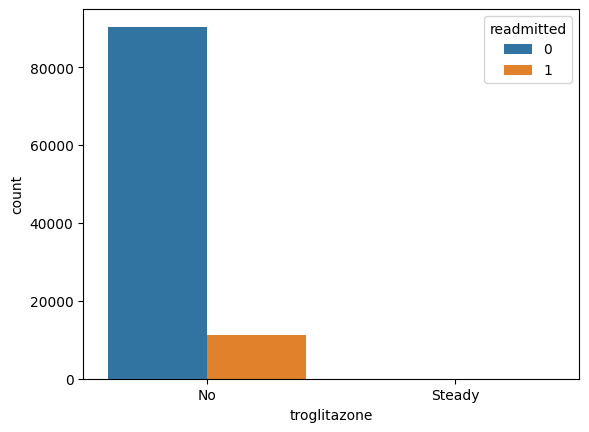

TROGLITAZONE
troglitazone
No        101760
Steady         3
Name: count, dtype: int64


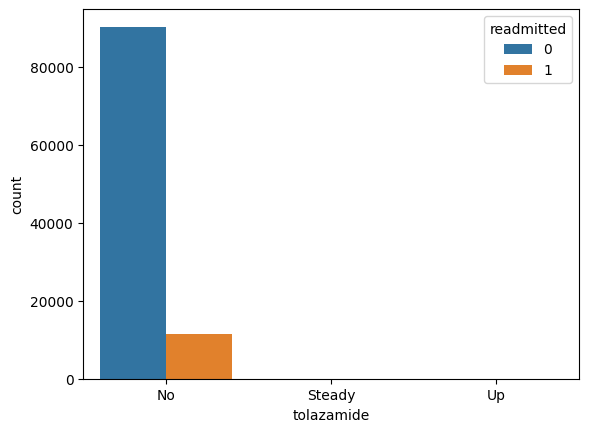

TOLAZAMIDE
tolazamide
No        101724
Steady        38
Up             1
Name: count, dtype: int64


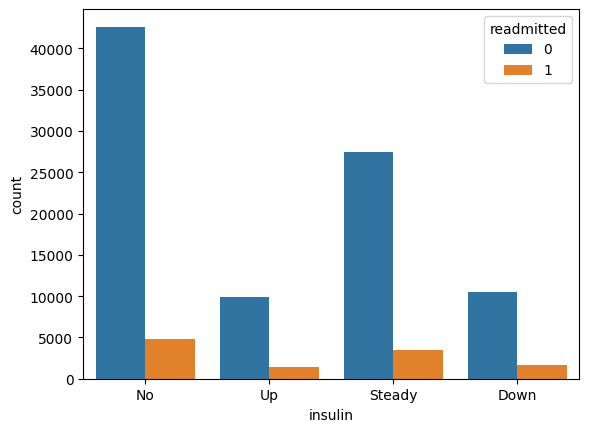

INSULIN
insulin
No        47380
Steady    30849
Down      12218
Up        11316
Name: count, dtype: int64


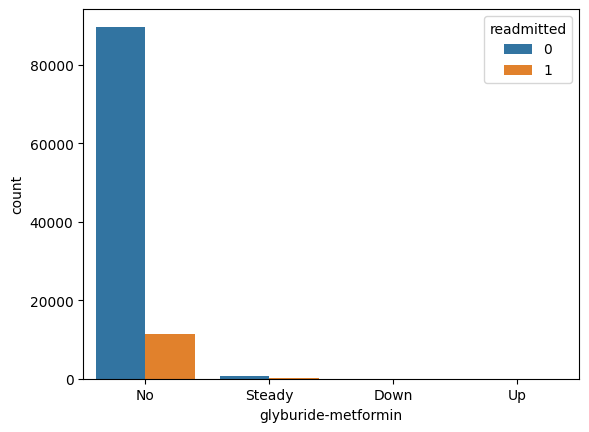

GLYBURIDE-METFORMIN
glyburide-metformin
No        101057
Steady       692
Up             8
Down           6
Name: count, dtype: int64


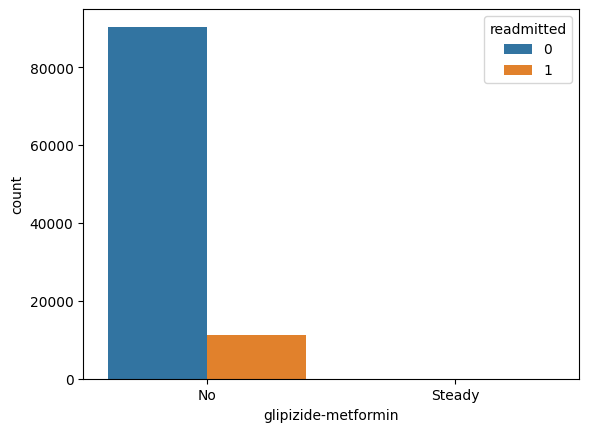

GLIPIZIDE-METFORMIN
glipizide-metformin
No        101750
Steady        13
Name: count, dtype: int64


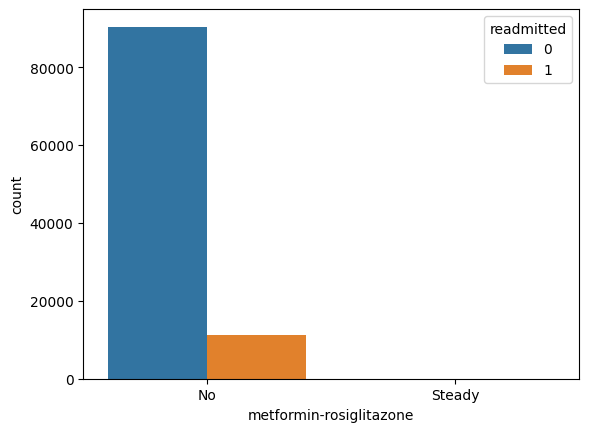

METFORMIN-ROSIGLITAZONE
metformin-rosiglitazone
No        101761
Steady         2
Name: count, dtype: int64


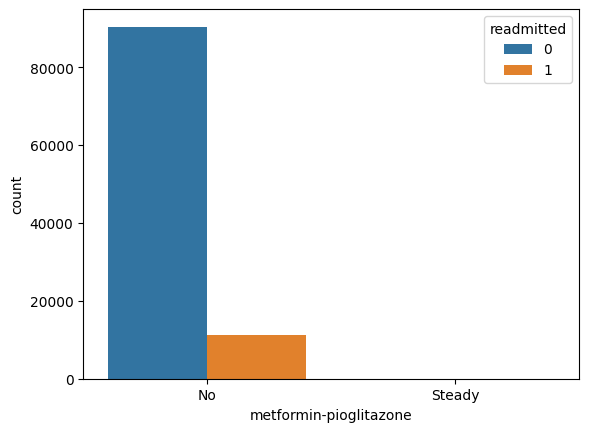

METFORMIN-PIOGLITAZONE
metformin-pioglitazone
No        101762
Steady         1
Name: count, dtype: int64


In [53]:
drug_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
             'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
             'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
             'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
             'metformin-rosiglitazone', 'metformin-pioglitazone']

def explore_drug(drugs):

  for drug in drugs:
    sns.countplot(x = drug, 
                  hue = "readmitted",
                  data = diabetic_data)
    plt.show()
    print(drug.upper())
    print(diabetic_data[f"{drug}"].value_counts())
    

explore_drug(drug_cols)

Change:
Indicates if there was a change in diabetic medications

In [54]:
diabetic_data.change.value_counts()


change
No    54754
Ch    47009
Name: count, dtype: int64

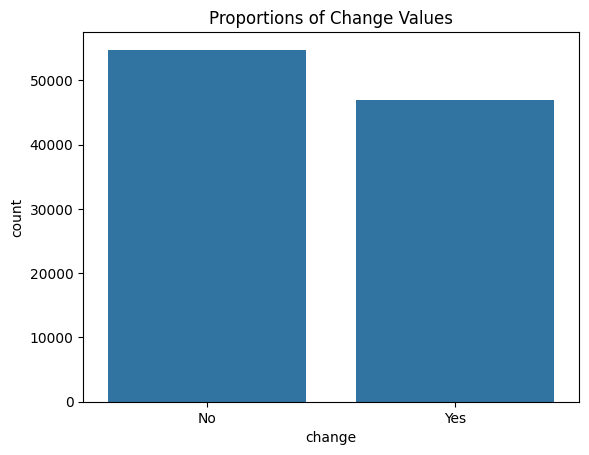

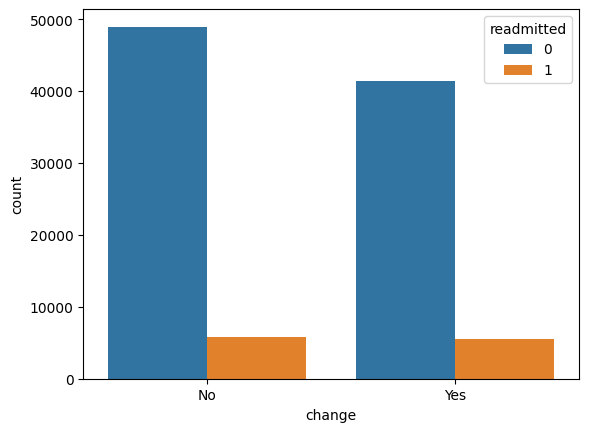

In [55]:
diabetic_data.change = diabetic_data.change.replace("Ch","Yes")

sns.countplot(x = "change", data = diabetic_data)
plt.title("Proportions of Change Values")
plt.show()

sns.countplot(x = "change", hue = "readmitted", data = diabetic_data)
plt.show()


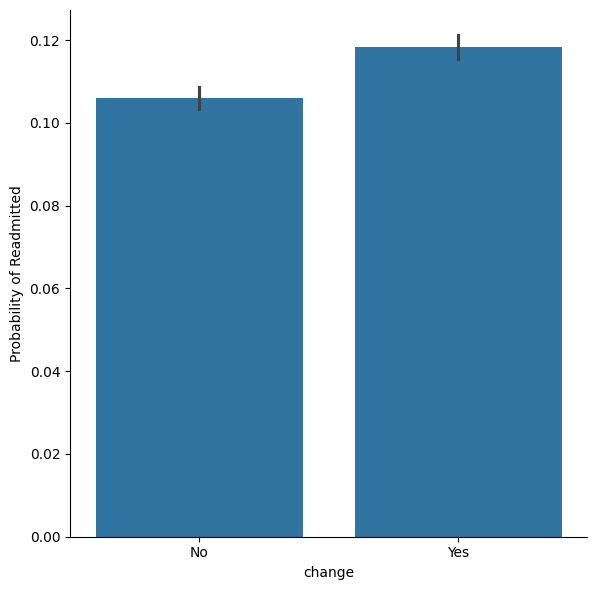

In [56]:
g = sns.catplot(x = "change", y="readmitted", data = diabetic_data, height = 6, kind ="bar")
g.set_ylabels("Probability of Readmitted")
plt.show() 

Dropping the duplicate entries

In [58]:
diabetic_data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2271
gender                          0
age                             0
admission_type_id           10396
discharge_disposition_id     4680
admission_source_id          6942
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96417
A1Cresult                   84745
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide   

In [59]:
diabetic_data['race'] = diabetic_data['race'].fillna(diabetic_data['race'].mode()[0])

In [60]:
diabetic_data['admission_type_id'] = diabetic_data['admission_type_id'].fillna(diabetic_data['admission_type_id'].mode()[0])

In [61]:
diabetic_data['discharge_disposition_id'] = diabetic_data['discharge_disposition_id'].fillna(diabetic_data['discharge_disposition_id'].mode()[0])

In [62]:
diabetic_data['admission_source_id'] = diabetic_data['admission_source_id'].fillna(diabetic_data['admission_source_id'].mode()[0])

In [63]:
diabetic_data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,Emergency,Discharged to Home,Referral,1,41,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,15,Emergency,Discharged to Home,Emergency,3,59,...,No,Up,No,No,No,No,No,Yes,Yes,0
2,64410,86047875,AfricanAmerican,Female,25,Emergency,Discharged to Home,Emergency,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,35,Emergency,Discharged to Home,Emergency,2,44,...,No,Up,No,No,No,No,No,Yes,Yes,0
4,16680,42519267,Caucasian,Male,45,Emergency,Discharged to Home,Emergency,1,51,...,No,Steady,No,No,No,No,No,Yes,Yes,0


In [64]:
cat_data = diabetic_data.select_dtypes('O')

num_data = diabetic_data.select_dtypes(np.number)

cat_data

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,Emergency,Discharged to Home,Referral,Diabetes,Other,Other,NaN,NaN,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,Emergency,Discharged to Home,Emergency,Other,Diabetes,Other,NaN,NaN,...,No,No,Up,No,No,No,No,No,Yes,Yes
2,AfricanAmerican,Female,Emergency,Discharged to Home,Emergency,Other,Diabetes,Other,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,Emergency,Discharged to Home,Emergency,Other,Diabetes,Circulatory,NaN,NaN,...,No,No,Up,No,No,No,No,No,Yes,Yes
4,Caucasian,Male,Emergency,Discharged to Home,Emergency,Neoplasms,Neoplasms,Diabetes,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,Emergency,Other,Emergency,Diabetes,Other,Circulatory,NaN,>8,...,No,No,Down,No,No,No,No,No,Yes,Yes
101762,AfricanAmerican,Female,Emergency,Other,Other,Digestive,Other,Digestive,NaN,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,Emergency,Discharged to Home,Emergency,Other,Genitourinary,Other,NaN,NaN,...,No,No,Down,No,No,No,No,No,Yes,Yes
101764,Caucasian,Female,Emergency,Other,Emergency,Injury,Other,Injury,NaN,NaN,...,No,No,Up,No,No,No,No,No,Yes,Yes


In [65]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in cat_data:
  cat_data[i] = le.fit_transform(cat_data[i])

In [66]:
data = pd.concat([num_data,cat_data],axis=1)
data.head()

,encounter_id,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,2278392,8222157,5,1,41,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1,149190,55629189,15,3,59,0,18,0,0,0,...,0,0,3,1,0,0,0,0,1,1
2,64410,86047875,25,2,11,5,13,2,0,1,...,0,0,1,1,0,0,0,0,0,1
3,500364,82442376,35,2,44,1,16,0,0,0,...,0,0,3,1,0,0,0,0,1,1
4,16680,42519267,45,1,51,0,8,0,0,0,...,0,0,2,1,0,0,0,0,1,1


In [67]:
data.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)

In [68]:
data.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,5,1,41,0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
1,15,3,59,0,18,0,0,0,9,0,...,0,0,3,1,0,0,0,0,1,1
2,25,2,11,5,13,2,0,1,6,0,...,0,0,1,1,0,0,0,0,0,1
3,35,2,44,1,16,0,0,0,7,0,...,0,0,3,1,0,0,0,0,1,1
4,45,1,51,0,8,0,0,0,5,0,...,0,0,2,1,0,0,0,0,1,1


Splitting the dependent and independent variable

In [69]:
X = data.drop('readmitted',axis=1)

y = data['readmitted']

Splitting into train and test

In [70]:
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler 

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

In [72]:
SC = StandardScaler()

X_train_scaled = pd.DataFrame(SC.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(SC.transform(X_test),columns=X_test.columns)

In [73]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((91586, 44), (10177, 44), (91586,), (10177,))

In [74]:
LR = LogisticRegression()

LR.fit(X_train_scaled,y_train)

LogisticRegression()

In [75]:
LR.score(X_train_scaled,y_train)

0.8884982420894023

In [76]:
LR.score(X_test_scaled,y_test)

0.8861157512036946

In [77]:
RF = RandomForestClassifier()

RF.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [78]:
RF.score(X_train_scaled,y_train)

0.9999235691044482

In [79]:
RF.score(X_test_scaled,y_test)

0.8872948806131473

In [80]:
y_pred = RF.predict(X_test)

In [81]:
confusion_matrix(y_test,y_pred)

array([[8781,  250],
       [1096,   50]], dtype=int64)

In [82]:
accuracy_score(y_test,y_pred)

0.8677409845730569

In [84]:
z = pd.DataFrame([RF.feature_importances_,X_train.columns]).T

<Axes: xlabel='importance', ylabel='Feature'>

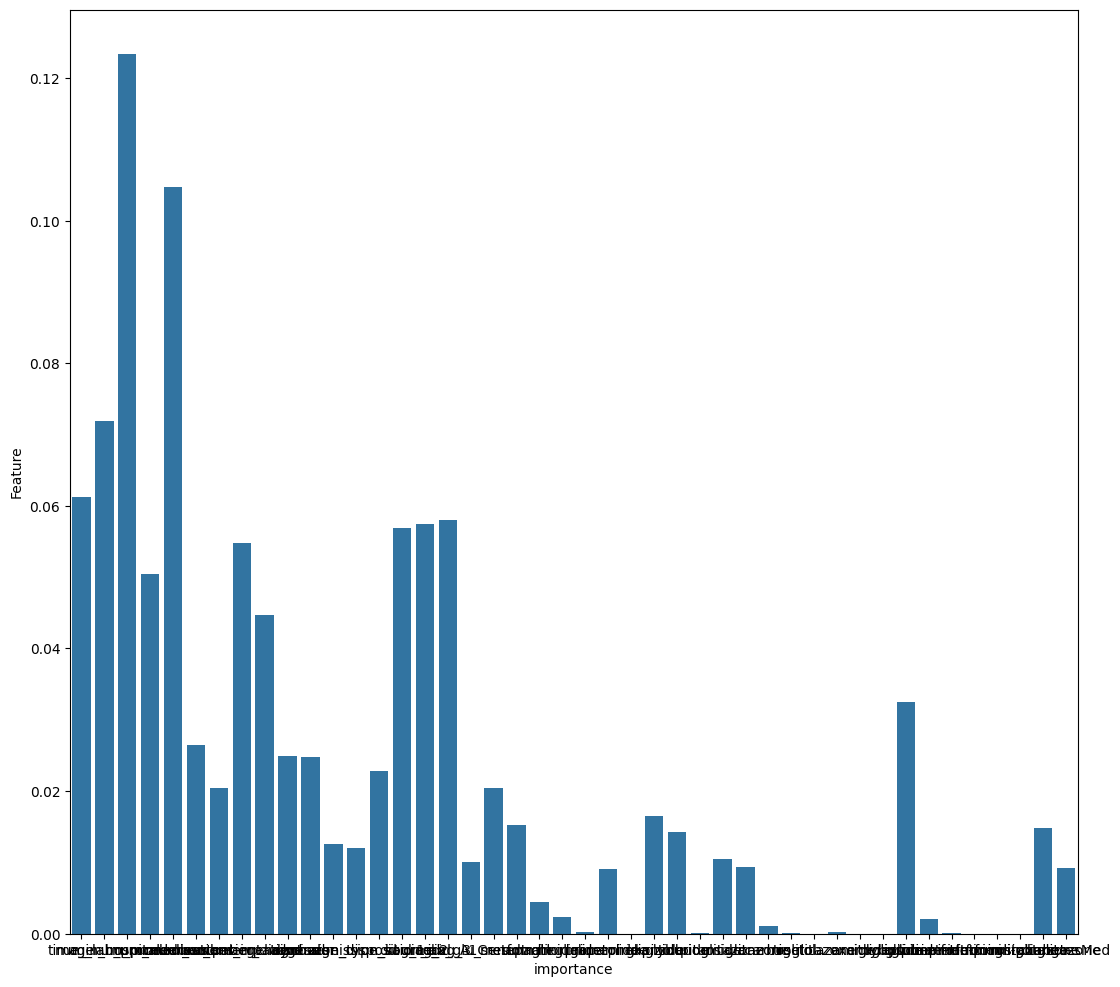

In [85]:
z.columns = ['Feature','importance']
plt.figure(figsize=(13,12))

sns.barplot(y=z['Feature'],x=z['importance'])

In [86]:
diabetic_data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,Emergency,Discharged to Home,Referral,1,41,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,15,Emergency,Discharged to Home,Emergency,3,59,...,No,Up,No,No,No,No,No,Yes,Yes,0
2,64410,86047875,AfricanAmerican,Female,25,Emergency,Discharged to Home,Emergency,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,35,Emergency,Discharged to Home,Emergency,2,44,...,No,Up,No,No,No,No,No,Yes,Yes,0
4,16680,42519267,Caucasian,Male,45,Emergency,Discharged to Home,Emergency,1,51,...,No,Steady,No,No,No,No,No,Yes,Yes,0


In [87]:
X.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,5,1,41,0,1,0,0,0,1,1,...,0,0,1,1,0,0,0,0,0,0
1,15,3,59,0,18,0,0,0,9,1,...,0,0,3,1,0,0,0,0,1,1
2,25,2,11,5,13,2,0,1,6,0,...,0,0,1,1,0,0,0,0,0,1
3,35,2,44,1,16,0,0,0,7,1,...,0,0,3,1,0,0,0,0,1,1
4,45,1,51,0,8,0,0,0,5,1,...,0,0,2,1,0,0,0,0,1,1


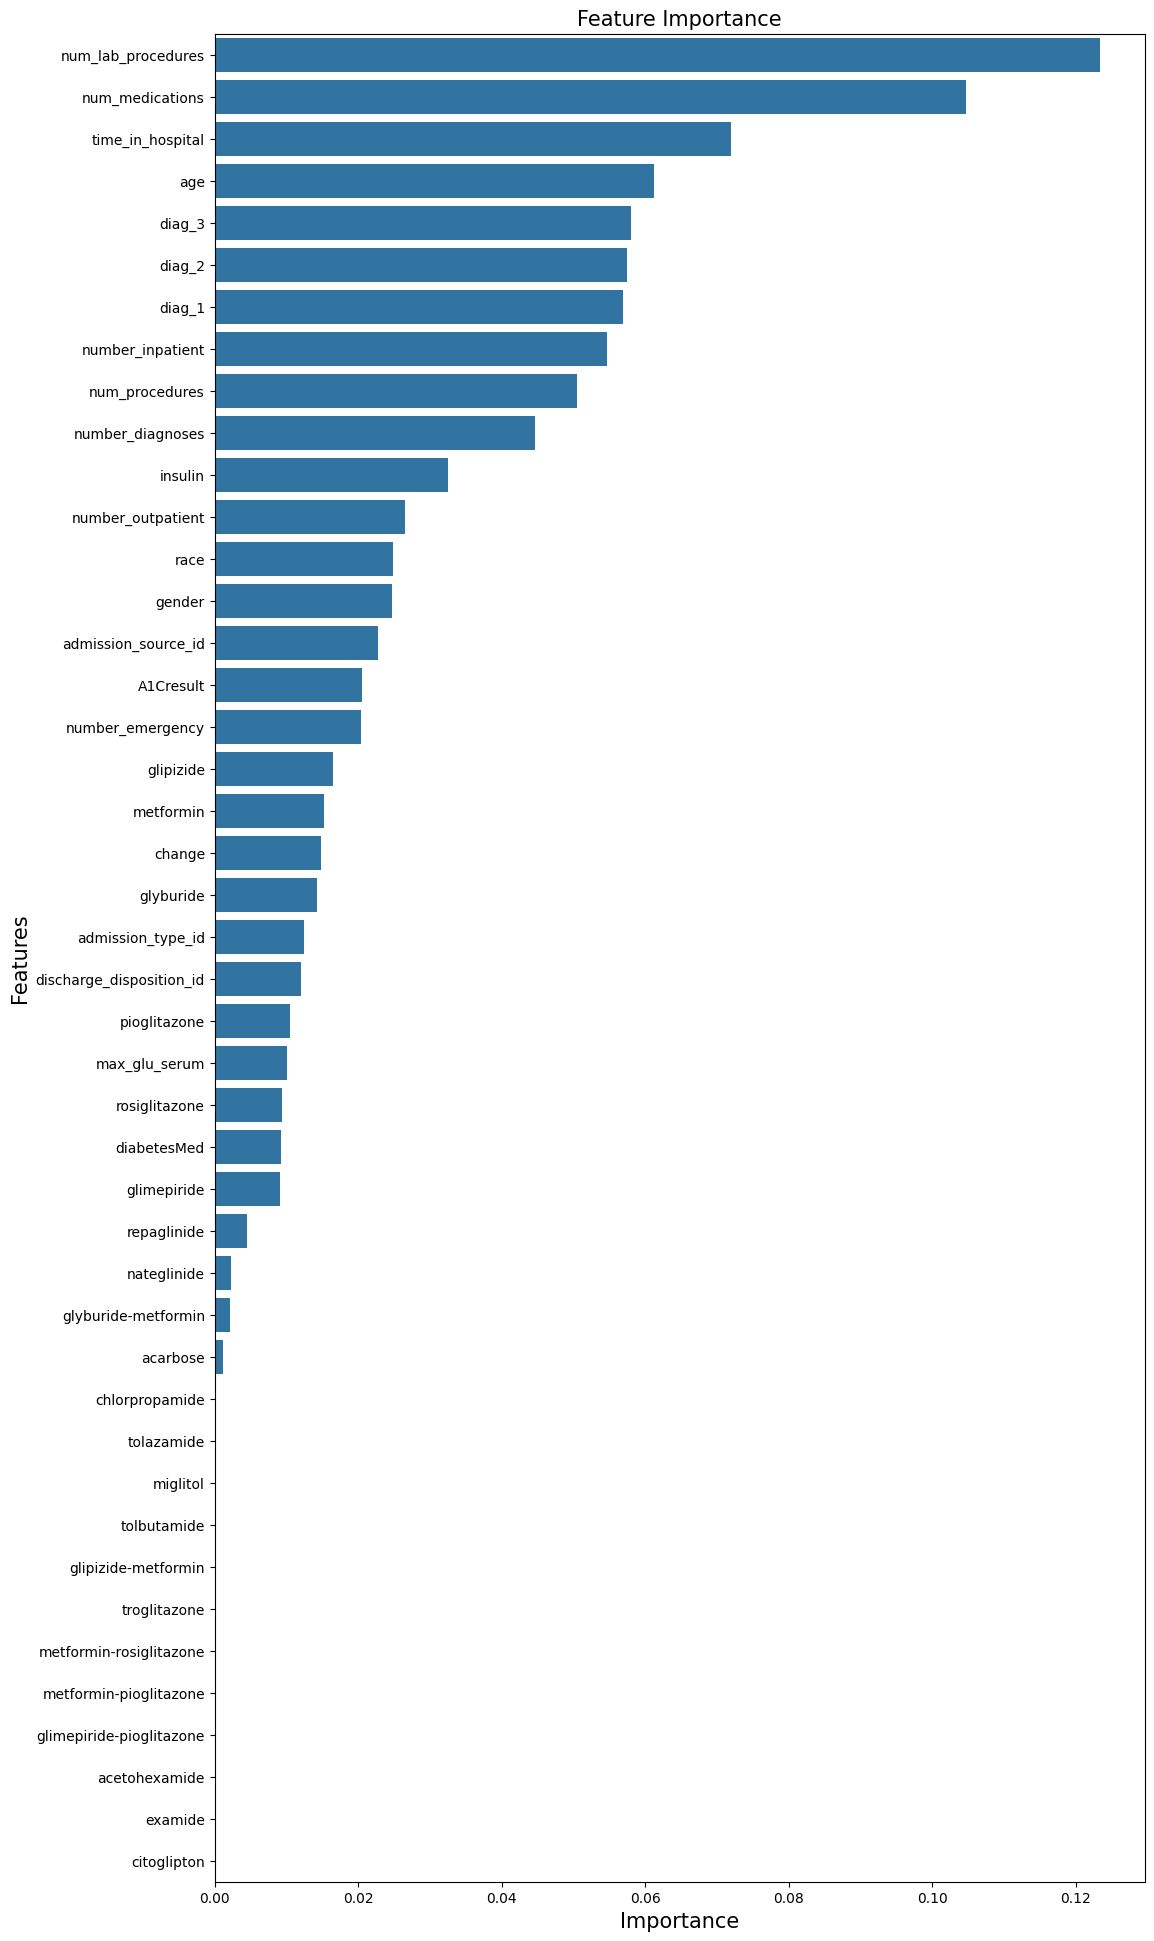

In [88]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': RF.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
plt.figure(figsize=(12,24))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [89]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model, test_data):
    
    # predict the target values using X_test
    y_pred = model.predict(test_data)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)


    # display the plot
    plt.show()
  

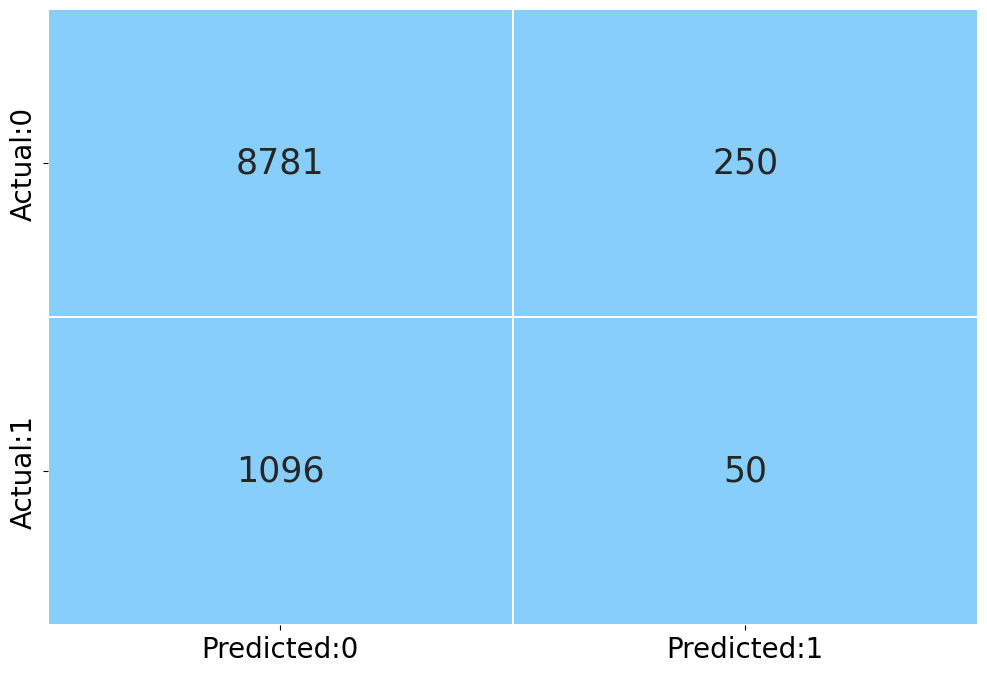

In [90]:
plt.figure(figsize=(12,8))
cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap =['lightskyblue'], cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)


    # display the plot
plt.show()

In [91]:
def plot_roc(model, test_data):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob = model.predict_proba(test_data)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Cancer Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)



In [95]:
pip install --upgrade lightgbm

Note: you may need to restart the kernel to use updated packages.


In [114]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score
from lightgbm import early_stopping, log_evaluation
import xgboost as xgb
  

def cross_val(X, y, model, params, folds=9):
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)
    
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        
        # Initialize model
        alg = model(**params)
        
        if model == xgb.XGBClassifier:
            evals = [(x_test, y_test)]  # Specify evaluation data
            # Remove 'eval_metric' and 'early_stopping_rounds' from fit if causing issues
            try:
                alg.fit(
                    x_train, y_train,
                    evals=evals  # Pass 'evals' directly
                )
            except TypeError:
                print("Fallback: Removing 'evals' from fit")
                alg.fit(x_train, y_train)
        elif model == LGBMClassifier:
            # LGBMClassifier uses 'callbacks' for early stopping
            alg.fit(
                x_train, y_train,
                eval_set=[(x_test, y_test)],
                eval_metric="auc",
                callbacks=[
                    early_stopping(stopping_rounds=100),
                    log_evaluation(period=100)
                ]
            )
        else:
            # For any other model, we proceed normally
            alg.fit(x_train, y_train)
        
        # Predicting and calculating ROC AUC score
        pred = alg.predict_proba(x_test)[:, 1]
        roc_score = roc_auc_score(y_test, pred)
        print(f"roc_auc_score: {roc_score}")
        print("-"*50)

    return alg


In [123]:
lgb_params= {'learning_rate': 0.045, 
             'n_estimators': 20000, 
             'max_bin': 94,
             'num_leaves': 10, 
             'max_depth': 27, 
             'reg_alpha': 8.457, 
             'reg_lambda': 6.853, 
             'subsample': 0.749}

from lightgbm import LGBMClassifier
lgb_model = cross_val(X, y, LGBMClassifier, lgb_params)

Fold: 0
[LightGBM] [Info] Number of positive: 80361, number of negative: 80360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 474
[LightGBM] [Info] Number of data points in the train set: 160721, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500003 -> initscore=0.000012
[LightGBM] [Info] Start training from score 0.000012
Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.845051	valid_0's binary_logloss: 0.507571
[200]	valid_0's auc: 0.864039	valid_0's binary_logloss: 0.470861
[300]	valid_0's auc: 0.872928	valid_0's binary_logloss: 0.452794
[400]	valid_0's auc: 0.880191	valid_0's binary_logloss: 0.438421
[500]	valid_0's auc: 0.883944	valid_0's binary_logloss: 0.430261
[600]	valid_0's auc: 0.88645	valid_0's binary_log

In [101]:
pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 4.2 MB/s eta 0:00:36
   ---------------------------------------- 1.3/150.0 MB 3.4 MB/s eta 0:00:45
   ---------------------------------------- 1.8/150.0 MB 3.2 MB/s eta 0:00:46
    --------------------------------------- 2.4/150.0 MB 3.2 MB/s eta 0:00:47
    --------------------------------------- 2.9/150.0 MB 3.1 MB/s eta 0:00:48
    --------------------------------------- 3.7/150.0 MB 3.1 MB/s eta 0:00:48
   - -------------------------------------- 4.2/150.0 MB 3.0 MB/s eta 0:00:49
   - -------------------------------------- 5.0/150.0 MB 3.1 MB/s eta 0:00:48
   - -------------------------------------- 5.5/150.0 MB 3.0 MB/s eta 0:00:48
   - -------------------------------------- 5.8/150.0 MB 3.0 MB/s eta 0:00:49
   - -------------------------------------- 6.3/150.0 MB 2.8 MB/s eta 0:00:51
   - -------------------------------------- 6.6/150.0 MB 2.7 MB/s eta 0

In [115]:
xgb_params= {'n_estimators': 20000, 
             'max_depth': 6, 
             'learning_rate': 0.0201, 
             'reg_lambda': 29.326, 
             'subsample': 0.818, 
             'colsample_bytree': 0.235, 
             'colsample_bynode': 0.820, 
             'colsample_bylevel': 0.453}

from xgboost import XGBClassifier
xgb_model = cross_val(X, y, XGBClassifier, xgb_params)

Fold: 0
Fallback: Removing 'evals' from fit
roc_auc_score: 0.6488825076337981
--------------------------------------------------
Fold: 1
Fallback: Removing 'evals' from fit
roc_auc_score: 0.6469272583990111
--------------------------------------------------
Fold: 2
Fallback: Removing 'evals' from fit
roc_auc_score: 0.646549047511239
--------------------------------------------------
Fold: 3
Fallback: Removing 'evals' from fit
roc_auc_score: 0.6431434140661791
--------------------------------------------------
Fold: 4
Fallback: Removing 'evals' from fit
roc_auc_score: 0.6446944376297153
--------------------------------------------------
Fold: 5
Fallback: Removing 'evals' from fit
roc_auc_score: 0.6530729782539586
--------------------------------------------------
Fold: 6
Fallback: Removing 'evals' from fit
roc_auc_score: 0.6427585768952551
--------------------------------------------------
Fold: 7
Fallback: Removing 'evals' from fit
roc_auc_score: 0.6349585738976506
--------------------

In [118]:
import imblearn

from imblearn.over_sampling import SMOTE

In [119]:
oversample = SMOTE()

X,y = oversample.fit_resample(X,y)


In [120]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

In [121]:
RF = RandomForestClassifier()

RF.fit(X_train,y_train)

RandomForestClassifier()

In [122]:
RF.score(X_train,y_train),RF.score(X_test,y_test)

(0.9999877097031893, 0.8956420749917045)